## Constrained Optimization
We are trying to find a line of the form $$y = \theta_1 x + \theta_2$$
that best fits the data. We are all familiar with the least-squares best fit line, given as $$\min_{\Theta} ||Y - X \Theta ||_2$$

where $\Theta = \begin{bmatrix} \theta_1 & \theta_2 \end{bmatrix}^T $ is the parameter vector, and $X$ and $Y$ are the parameter vectors given as
$$ X := \begin{bmatrix} x_1 & 1 \\ x_2 & 1  \\ \vdots & \vdots \\ x_N & 1 \end{bmatrix} \qquad Y := \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix}  $$

However we attempt to solve linear regression for both the $l_1$ and $l_\infty$ norms analytically, and then on a provided dataset. 

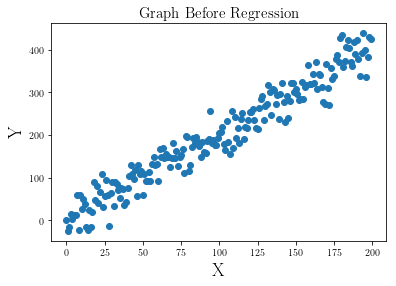

In [15]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


theta1_act, theta2_act = 2, 5 # parameter values
N = 200 # Number of points in dataset
mag = 30 # Noise magnitude

# datapoints
x = np.arange(0,N)
y = theta1_act * x + theta2_act *np.ones([1,N]) + np.random.normal(0,mag,N)

plt.figure()
plt.scatter(x,y)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# plt.clabel(CS, inline=1, fmt = '%1.1f', fontsize=10)
plt.xlabel(r'X', fontsize=18)
plt.ylabel(r'Y', fontsize=18)
plt.title('Graph Before Regression', fontsize = 15)
plt.savefig("Line.png", bbox_inches='tight')

plt.show()

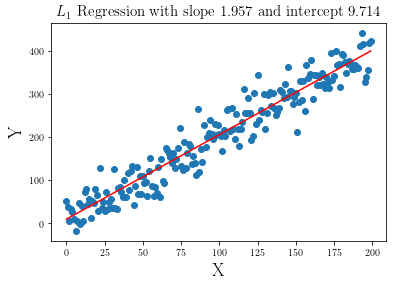

In [12]:
theta = cvx.Variable(2)

Y = y.T
X = np.vstack((x, np.ones(N))).T
t = cvx.Variable(N)


objective = cvx.Minimize(cvx.norm(t, 1))
constraints = [-t <= Y - X*theta, Y - X*theta<=t]
prob = cvx.Problem(objective, constraints)
prob.solve()

L1params = (float(theta.value[0]), float(theta.value[1]))
L1 = x * L1params[0] + L1params[1]

plt.figure()
plt.scatter(x,y)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x, L1, color = 'red' )
plt.xlabel(r'X', fontsize=18)
plt.ylabel(r'Y', fontsize=18)
plt.title(f'$L_1$ Regression with slope {L1params[0]:.3f} and intercept {L1params[1]:.3f}', fontsize = 15)
plt.savefig("L1.png", bbox_inches='tight')
plt.show()

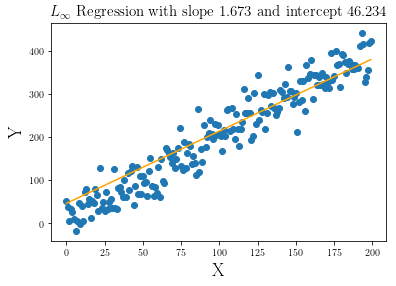

In [13]:
theta = cvx.Variable(2)

Y = y.T
X = np.vstack((x, np.ones(N))).T

objective = cvx.Minimize(cvx.norm(Y-X*theta, "inf"))
prob = cvx.Problem(objective)
prob.solve()


Linfparams = (float(theta.value[0]), float(theta.value[1]))
Linf = x * Linfparams[0] + Linfparams[1]


plt.figure()
plt.scatter(x,y)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x, Linf, color = 'orange' )
plt.xlabel(r'X', fontsize=18)
plt.ylabel(r'Y', fontsize=18)
plt.title(f'$L_\infty$ Regression with slope {Linfparams[0]:.3f} and intercept {Linfparams[1]:.3f}', fontsize = 15)
plt.savefig("Linf.png", bbox_inches='tight')
plt.show()

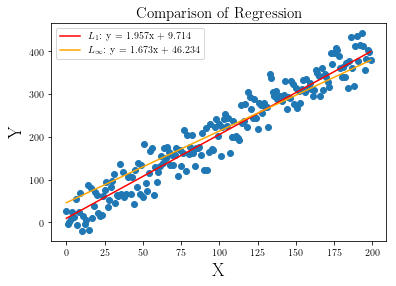

In [46]:

import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


theta1_act, theta2_act = 2, 5 # parameter values
N = 200 # Number of points in dataset
mag = 30 # Noise magnitude

# datapoints
x = np.arange(0,N)
y = theta1_act * x + theta2_act *np.ones([1,N]) + np.random.normal(0,mag,N)


## Stacking on same graph

plt.figure()
plt.scatter(x,y)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'X', fontsize=18)
plt.ylabel(r'Y', fontsize=18)
plt.plot(x, L1, color = 'red', 
         label = f"$L_1$: y = {L1params[0]:.3f}x + {L1params[1]:.3f}")
plt.plot(x, Linf, color = 'orange',
        label = f"$L_\infty$: y = {Linfparams[0]:.3f}x + {Linfparams[1]:.3f}")
plt.title('Comparison of Regression', fontsize = 15)
plt.legend()
plt.savefig("Comparison.png", bbox_inches='tight')
plt.show()
